In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [28]:
df_l=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df_l

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Here we can see there are total 614 rows and 13 columns

In [29]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


there some rows whose datatype is object and some are of float and our target varialble is loan status and its the classification prolem

In [30]:
df_l.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
df_l.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [32]:
df_l.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there are some null values in the columns of the dataset 

In [33]:
df_l.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [34]:
for column in df_l.columns:
    unique_count=df_l[column].nunique()
    unique_values= df_l[column].unique()
    print(f"column: {column}")
    print(f"Number of Unique Values: {unique_count}")
    print(f"Unique Values:{unique_values}\n")

column: Loan_ID
Number of Unique Values: 614
Unique Values:['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'L

In [35]:
# now we have to replace the Nan values by mean method for numericals and mode method for categorical columns

cat_col=['Gender','Married','Dependents','Self_Employed']
for col in cat_col:
    df_l[col].fillna(df_l[col].mode()[0],inplace=True)

num=['LoanAmount','Loan_Amount_Term','Credit_History']
for col in num:
    df_l[col].fillna(df_l[col].mean(),inplace=True)

In [36]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [37]:
#Loan ID column seem not more useful so lets drop the column

df_l=df_l.drop(['Loan_ID'],axis=1)

In [38]:
df_l.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


there is very high gap between the 75th percentile and the max value in the columns and there are ouliers in the dataset

Visualization part

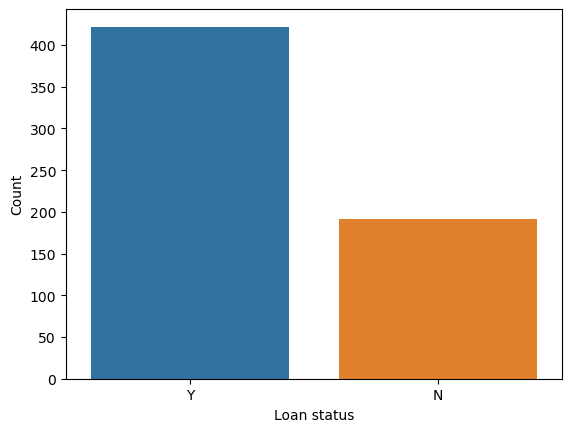

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [39]:
#lets make the count plot for the loan status

sns.countplot(x='Loan_Status',data=df_l)
plt.xlabel("Loan status")
plt.ylabel("Count")
plt.show()

df_l['Loan_Status'].value_counts()

it seems that maximum number of people loans are approved 

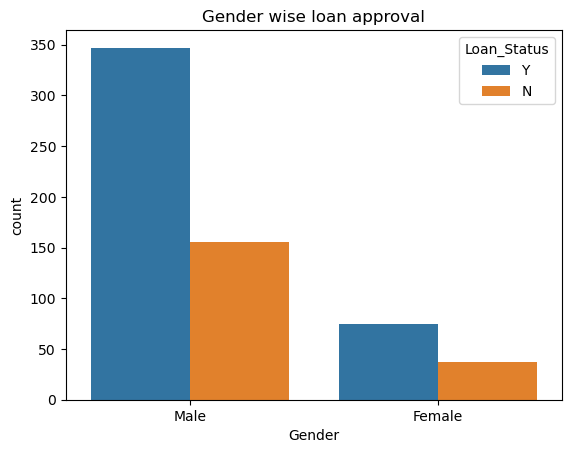

Gender
Male      502
Female    112
Name: count, dtype: int64

In [40]:
# Now lets explore with othe value counts

sns.countplot(x='Gender',hue='Loan_Status',data=df_l)
plt.title("Gender wise loan approval")
plt.xlabel("Gender")
plt.ylabel("count")
plt.show()

#lets count the value of the Genders
df_l['Gender'].value_counts()

here we can observe that male population was already more in the column and we can observe that maximum loan approvals are for the male applicant 

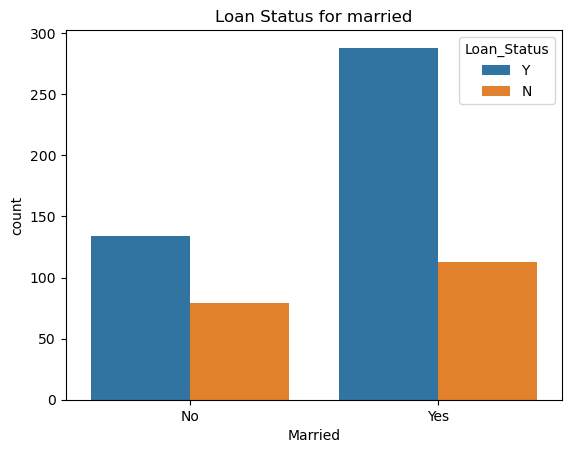

Married
Yes    401
No     213
Name: count, dtype: int64

In [41]:
#lets check for the married couples

sns.countplot(x='Married' , hue='Loan_Status', data=df_l)
plt.title("Loan Status for married")
plt.xlabel("Married")
plt.show()

df_l['Married'].value_counts()

As we can observe that married profile are maximum in the column and loan status apprved more of the married profile as comapers to the unmarried

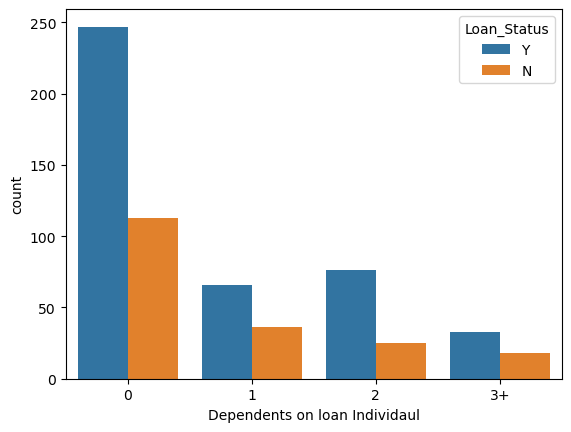

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [42]:
sns.countplot(x='Dependents',hue='Loan_Status', data=df_l)
plt.xlabel("Dependents on loan Individaul")
plt.ylabel("count")
plt.show()

df_l['Dependents'].value_counts()

The person who are single there loan status is approved at maximum


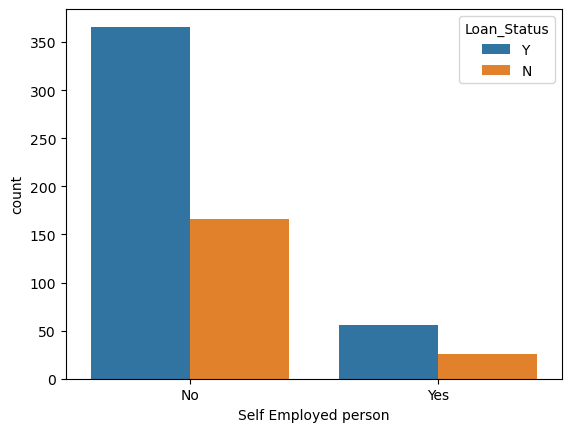

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [43]:
sns.countplot(x='Self_Employed',hue='Loan_Status', data=df_l)
plt.xlabel("Self Employed person")
plt.ylabel("count")
plt.show()

df_l['Self_Employed'].value_counts()

The person who are Not self employed there loan status is approved at maximum compared to A person who is self employed

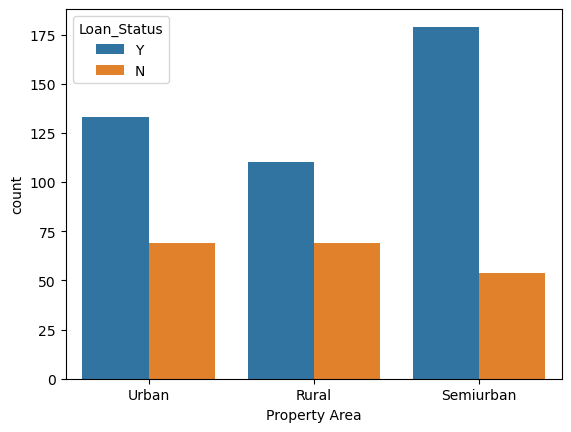

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [44]:
sns.countplot(x='Property_Area',hue='Loan_Status', data=df_l)
plt.xlabel("Property Area")
plt.ylabel("count")
plt.show()

df_l['Property_Area'].value_counts()

Its clear that person living in the semiurban area are likely to get loan approved then next is Urban following at last the rural area

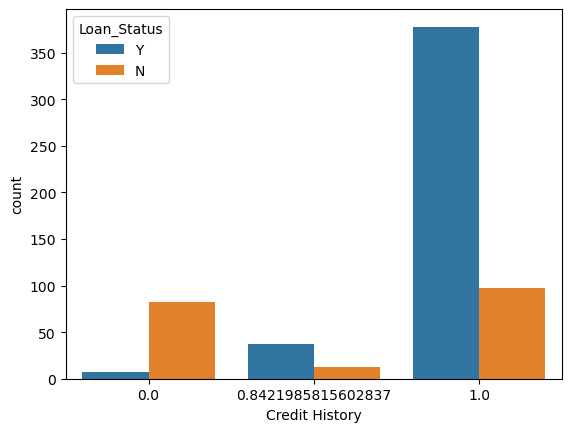

Credit_History
1.000000    475
0.000000     89
0.842199     50
Name: count, dtype: int64

In [45]:
sns.countplot(x='Credit_History',hue='Loan_Status', data=df_l)
plt.xlabel("Credit History")
plt.ylabel("count")
plt.show()

df_l['Credit_History'].value_counts()

In [49]:
df_l1=df_l.copy()

Here we can observe that with credit history 1 loan have been approved the most

In [50]:
cat_cols = df_l1.select_dtypes(['object']).columns

cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [51]:
# encoding categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in cat_cols:
    df_l1[col]=label_encoder.fit_transform(df_l1[col])

In [52]:
df_l1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [86]:
due lable encoder we converted sting value in numbers for the modelling

SyntaxError: invalid syntax (390384275.py, line 1)

checking for the outliers

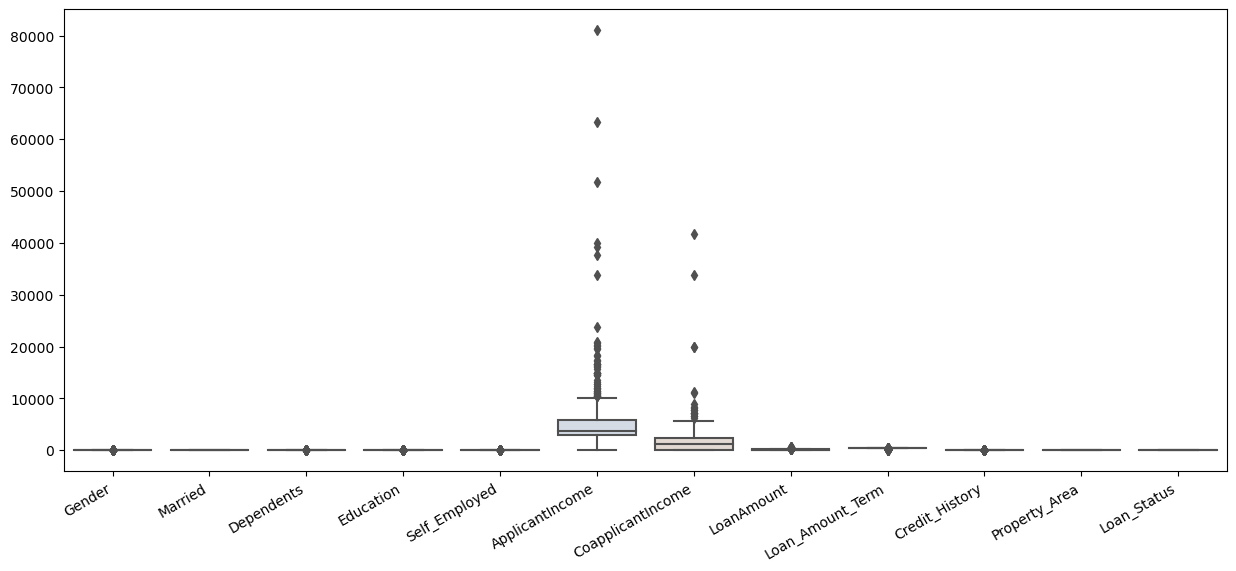

In [55]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_l1, palette='coolwarm')
plt.xticks(rotation=30,ha='right')
plt.show()

here we can see the outliers and we have to remove the outliers by z-score method

In [56]:
from scipy import stats
# Calculate the Z-Scores for each numerical attribute
num= df_l1.drop('Loan_Status', axis=1).select_dtypes(include=['number']).columns
z_scores=np.abs(stats.zscore(df_l1[num]))

# Set a threshold for considering data points as outliers 
threshold=3

# Identify outliers using the threshold
outliers=(z_scores > threshold).any(axis=1)

# Filter the dataset to remove rows with outliers
df_l2=df_l1[~outliers]
df_l2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [57]:
#shape of new and old dataframe
print('old Dataframa--',df_l1.shape[0])
print('New DataFrame--',df_l2.shape[0])

old Dataframa-- 614
New DataFrame-- 577


In [58]:
print(((df_l1.shape[0]-df_l2.shape[0])/df_l1.shape[0])*100)

6.026058631921824


Outliers removed and loss of data is looking bit more but within the limits and with remaining values we can predict the dataset

Now modelling the data and splitting the data in 80:20 for modelling

In [60]:
# Splitting the dataset into train and test sets

X = df_l2.drop('Loan_Status', axis=1)
y = df_l2['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Initialize and train a Decision Tree model
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Initialize and train a Random Forest model
rm= RandomForestClassifier()
rm.fit(X_train, y_train)

# Initialize the linear Regressionmoder
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

# Evaluate the Decision Tree model
y_pred= dt.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test,y_pred)
decision_tree_report = classification_report(y_test, y_pred)

# Evaluate the Random Forest model
y_pred= rm.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, y_pred)
random_forest_report = classification_report(y_test, y_pred)

y_pred= dt.predict(X_test)
Linear_Regression_accuracy = accuracy_score(y_test,y_pred)
Linear_Regression_report = classification_report(y_test, y_pred)

print("\nDecision Tree Model:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print("Classification Report:\n", decision_tree_report)

print("\nRandom Forest Model:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print("Classification Report:\n", random_forest_report)

print("\nLineat Regression Model:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print("Classification Report:\n", decision_tree_report)



Decision Tree Model:
Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49        31
           1       0.81      0.82      0.82        85

    accuracy                           0.73       116
   macro avg       0.66      0.65      0.66       116
weighted avg       0.73      0.73      0.73       116


Random Forest Model:
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.42      0.57        31
           1       0.82      0.98      0.89        85

    accuracy                           0.83       116
   macro avg       0.84      0.70      0.73       116
weighted avg       0.83      0.83      0.81       116


Lineat Regression Model:
Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49        31
           1       0.81      0.82      0.82       

Random Forest model have more accuracy as compared to other models we can try to predict the values now for the random data

we are doing hyperparameter tuning with grid search tuning whether it enhances the performance of the dataset or not

In [65]:
from sklearn.model_selection import GridSearchCV

# Creating the parameter grid
param_grid = {'n_estimators': [50, 100, 150],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10]}

# Creating the Random Forest Classifier
rm= RandomForestClassifier()

# Create Grid Search
grid_search = GridSearchCV(estimator=rm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model for predictions
best_rm = grid_search.best_estimator_
y_pred = best_rm.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}


In [66]:
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8275862068965517


after the hyperparameter tuning from grid search method we got an accuracy of 82% which is less the random forest classifier of 83% We should look for random forest classifier for prdiction

In [85]:
# Creating a random DataFrame with the test data 
test_data = pd.DataFrame({'Gender': ['Male', 'Male', 'FeMale', 'Male', 'Male'],
'Married': ['No', 'Yes', 'Yes', 'Yes', 'No'],
'Dependents': ['0', '1', '0', '0', '0'],
'Education': ['Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate'],
'Self_Employed': ['No', 'No', 'Yes', 'No', 'No'],
'ApplicantIncome': [5849, 4583, 3000, 2583, 6000],
'CoapplicantIncome': [0, 1508, 0, 2358, 0],
'LoanAmount': [221, 128, 66, 120, 141],
'Loan_Amount_Term': [360, 360, 360, 360, 360],
'Credit_History': [0, 1, 1, 1, 1],
'Property_Area': ['Urban', 'Rural', 'Urban', 'Urban', 'Urban']})


In [81]:
cat_cols1 = test_data.select_dtypes(['object']).columns

cat_cols1

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [82]:
label_encoder = LabelEncoder()

for col in cat_cols1:
    test_data[col]=label_encoder.fit_transform(test_data[col])

In [83]:
#  X_train having the data of the triaining dataset 
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Using the trained model to make predictions on the test dataset
y_test_pred = model.predict(test_data)

# Now, y_pred contains the predicted values for the test dataset

In [84]:
test_data['y_test_pred']=y_test_pred
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,y_test_pred
0,1,0,0,0,0,5849,0,221,360,0,1,0
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,0,1,0,0,1,3000,0,66,360,1,1,1
3,1,1,0,1,0,2583,2358,120,360,1,1,1
4,1,0,0,0,0,6000,0,141,360,1,1,1


Here we can observe as per prediction that as per random data created and predicted the values like loan will get approved or not as per factors mentioned in the dataset